# Titanic Survival Prediction using Logistic Regression

This notebook builds a machine learning model to predict which passengers survived the Titanic disaster using Logistic Regression. We'll clean the dataset, train a model, evaluate it, and visualize key insights.

## Step 1: Load the Dataset

We start by importing required libraries and loading the Titanic dataset.


In [1]:
### Step 1: Load the Dataset

# We start by importing essential Python libraries for data handling and loading the Titanic dataset.
#  `pandas` for working with the dataset
# We load the CSV file 'titanic.csv' into a pandas DataFrame.

import pandas as pd
df = pd.read_csv("titanic.csv")

In [2]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## Step 2: Identify Missing Data

Check how many null values are present in each column.


In [25]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Step 3: Data Cleaning

We handle missing values and drop unnecessary columns like 'Cabin', 'Name', 'Ticket', and 'PassengerId'.


In [26]:
# Filling the missing Age values with median function
df['Age'] = df['Age'].fillna(df['Age'].median())

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [28]:
# Drop the Cabin column becoz too many missing values
df.drop('Cabin',axis=1,inplace=True)

In [29]:
df.drop(['Name','Ticket'],axis=1,inplace=True)

In [30]:
df.drop('PassengerId', axis=1, inplace=True)


In [31]:
# Filling the missing Embarked values with mode
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

## Step 4: Encode Categorical Variables

Convert 'Sex' and 'Embarked' columns into numerical format for model compatibility.


In [32]:
df['Embarked'] = df['Embarked'].map({'S':0,'C':1,'Q':2})
#ports have id now southampton 0 cherbourg 1 queenstown 2

In [33]:
df['Sex'] = df['Sex'].map({'male':0,'female':1})

## Step 5: Feature & Target Split

Separate input features (X) and the target variable (y).


In [34]:
X = df.drop('Survived', axis=1)
y = df['Survived']

## Step 6: Split the Data

Split the dataset into training and testing sets using 80/20 ratio.


In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Step 7: Train the Model

Train a logistic regression model using the training set.


In [36]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

## Step 8: Evaluate the Model

Use accuracy, confusion matrix, and classification report to evaluate model performance.


In [37]:
#Predictions & Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7988826815642458

Confusion Matrix:
 [[89 16]
 [20 54]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [38]:
print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (891, 7)
y shape: (891,)


In [39]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,3,0,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,2,0,27.0,0,0,13.0000,0
887,1,1,19.0,0,0,30.0000,0
888,3,1,28.0,1,2,23.4500,0
889,1,0,26.0,0,0,30.0000,1


## Step 9: Visualize Confusion Matrix

Plot a heatmap of the confusion matrix for better visual understanding.


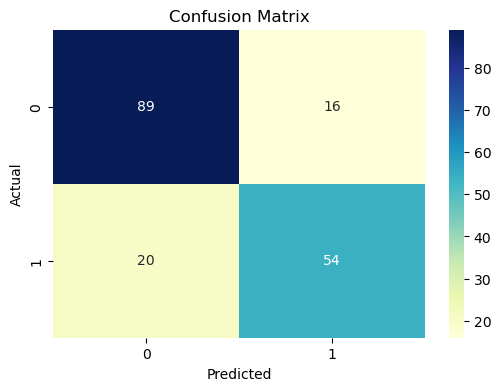

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## Step 10: Feature Importance

Display how much each feature contributed to the survival prediction using model coefficients.


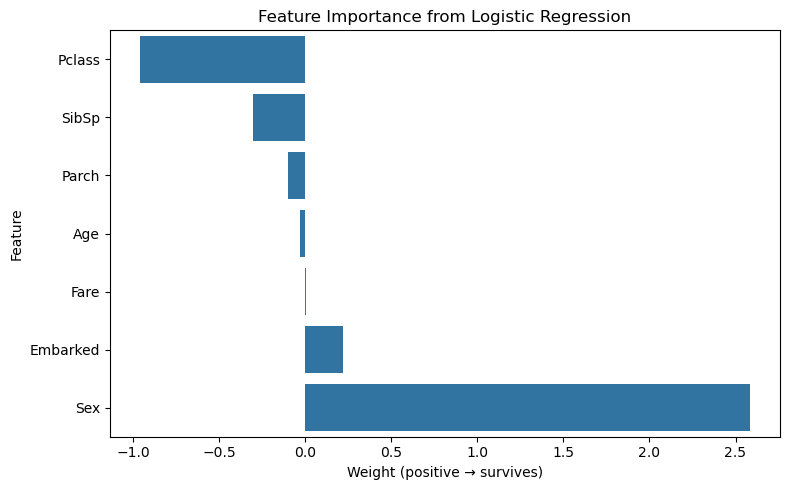

In [41]:
import pandas as pd
feature_names = X.columns
importance = model.coef_[0]

feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance
}).sort_values(by='Importance')

plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance from Logistic Regression')
plt.xlabel('Weight (positive → survives)')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


In [44]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Final Model Evaluation")
print("Accuracy:", round(accuracy * 100, 2), "%")
print("\nClassification Report:\n", report)

Final Model Evaluation
Accuracy: 79.89 %

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



## Final Thoughts

The logistic regression model achieved around 80% accuracy in predicting survival on the Titanic dataset. 
Key insights include:
- 'Sex' was the most influential factor (females had higher survival odds)
- Fare and Pclass also had a significant impact
- Logistic Regression was a great starting point; further improvements could include Random Forest or SVM.

The project includes model saving, visual evaluation
